Thinkful Bootcamp Course

Author: Ian Heaton

Email: iheaton@gmail.com

Mentor: Nemanja Radojkovic

Date: 2017/02/28


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import scipy.stats as stats
import stats_toolbox as st

sb.set_style('darkgrid')

# The European Social Survey (ESS)

Using selected questions from the 2012 and 2014 editions of the European Social Survey, questions concerning people’s level of trust, fairness of others and happiness will be assessed.

In [44]:
survey_data = pd.read_csv('/media/ianh/space/ThinkfulData/EuropeanSocialSurvey/ESSdata_Thinkful_1.4.8.csv')
print('Data set has %d rows and %d columns' % (survey_data.shape[0], survey_data.shape[1]))

Data set has 8594 rows and 13 columns


In [5]:
def translate_date_field(value):
    if value == 7:
        return 2014
    elif value == 6:
        return 2012
     
survey_data['year'] = survey_data['year'].apply(translate_date_field)

## 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [6]:
# Decompose data frame into smaller data structure one for each one of the 6 countries.
Switzerland_Data = survey_data[survey_data['cntry'] == 'CH']
CzechRepublic_Data = survey_data[survey_data['cntry'] == 'CZ']
Spain_Data = survey_data[survey_data['cntry'] == 'ES']
Norway_Data = survey_data[survey_data['cntry'] == 'NO']
Sweden_Data = survey_data[survey_data['cntry'] == 'SE']
Germany_Data = survey_data[survey_data['cntry'] == 'DE']

### Switzerland

First we will look at the number of survey responses, to see if we have roughly equal numbers for the two years.

   year  cntry  idno  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0  2012    773   773    772      773      770     771    770      770     762   
1  2014    773   773    773      773      773     773    773      772     765   

   gndr  agea  partner  
0   773   752      773  
1   773   751      773  


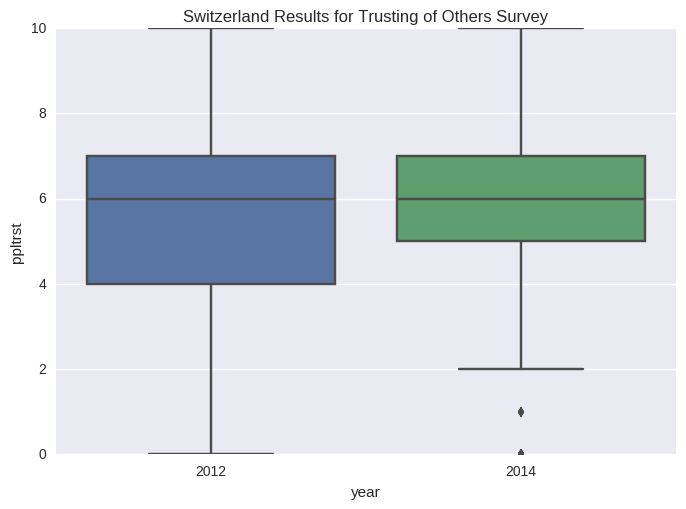

In [27]:
grpby = Switzerland_Data.groupby(['year'], as_index=False)
print(grpby.count())
# Create box plot of Trust survey results to visualize the different countries’ median.
sb.boxplot(y="ppltrst", x="year", data=Switzerland_Data)
sb.plt.title('Switzerland Results for Trusting of Others Survey')
plt.show()

From the above box plot it appears that their is little difference between the two years.  The first quartile is higher for the 2015 at 5.  
Since we are working with data that is ordinal we will perform the Kruskal- Wallace Test to look for significant differences between the median of the two years. Because the data is ordinal it does not make sense to use the mean.

In [22]:
# Determining if there is a significant difference in how those surveyed from Switzerland
# trust others between 2012 and 2014
stats.kruskal(Switzerland_Data.query('year == 2012').ppltrst,
              Switzerland_Data.query('year == 2014').ppltrst)


KruskalResult(statistic=0.30163599644480188, pvalue=0.58285861114420479)

### Czech Republic

   year  cntry  idno  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0  2012    658   658    653      651      649     654    646      655     644   
1  2014    658   658    658      657      658     657    652      655     650   

   gndr  agea  partner  
0   658   639      656  
1   648   641      652  


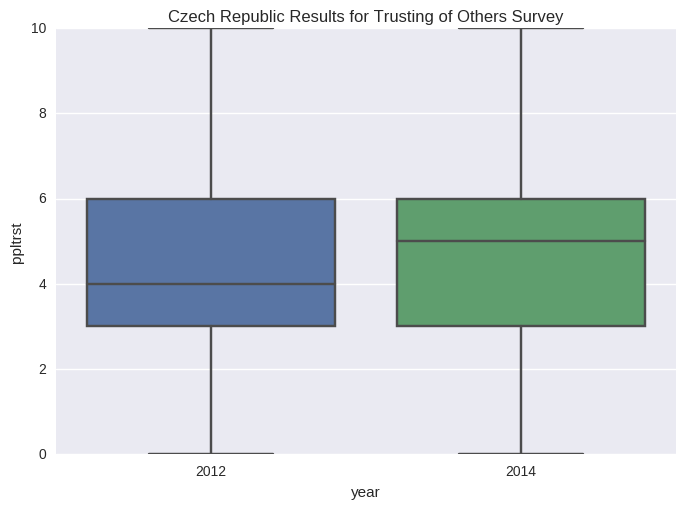

In [52]:
grpby = CzechRepublic_Data.groupby(['year'], as_index=False)
print(grpby.count())
sb.boxplot(y="ppltrst", x="year", data=CzechRepublic_Data)
sb.plt.title('Czech Republic Results for Trusting of Others Survey')
plt.show()

Between the two years there is an increase in the median yet the first and third quartiles remain the same. 

In [25]:
# Determining if there is a significant difference in how those surveyed from the Czech Republic
# trust others between 2012 and 2014
stats.kruskal(CzechRepublic_Data.query('year == 2012').ppltrst,
              CzechRepublic_Data.query('year == 2014').ppltrst, nan_policy='omit')

KruskalResult(statistic=0.72115913853012281, pvalue=0.39576395374563522)

### Spain 

   year  cntry  idno  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0  2012   1213  1213   1213     1213     1211    1208   1212     1211    1203   
1  2014   1213  1213   1212     1211     1199    1209   1212     1211    1185   

   gndr  agea  partner  
0  1213  1178     1210  
1  1213  1182     1210  


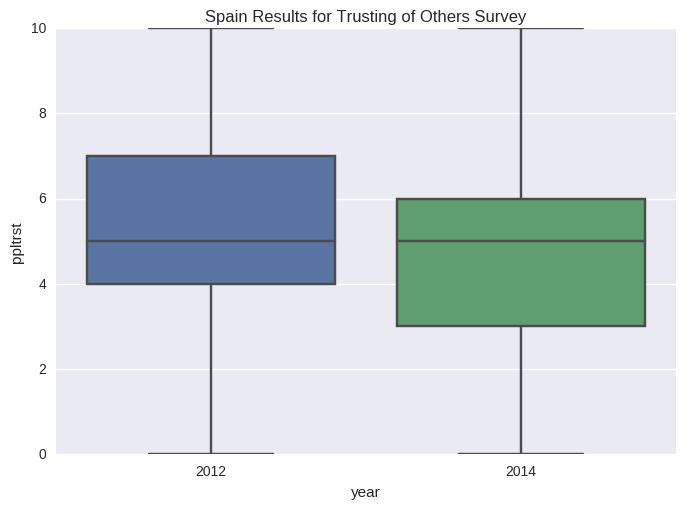

In [31]:
grpby = Spain_Data.groupby(['year'], as_index=False)
print(grpby.count())
sb.boxplot(y="ppltrst", x="year", data=Spain_Data)
sb.plt.title('Spain Results for Trusting of Others Survey')
plt.show()

In [32]:
# Determining if there is a significant difference in how those surveyed from Spain
# trust others between 2012 and 2014
stats.kruskal(Spain_Data.query('year == 2012').ppltrst,
              Spain_Data.query('year == 2014').ppltrst, nan_policy='omit')

KruskalResult(statistic=8.216087354735361, pvalue=0.0041520627675982)

There is a significant difference in the two years for the Spanish data, surprising considering the above box plots.
Lets look at the number of missing values for each year, perhaps this creates a small sample size which could result in high variability. 

In [34]:
Spain_Data.query('year == 2012').ppltrst.isnull().sum()
Spain_Data.query('year == 2014').ppltrst.isnull().sum()

2

### Norway

   year  cntry  idno  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0  2012    731   731    731      730      729     729    727      731     726   
1  2014    731   731    731      730      729     728    731      731     731   

   gndr  agea  partner  
0   731   718      729  
1   731   718      730  


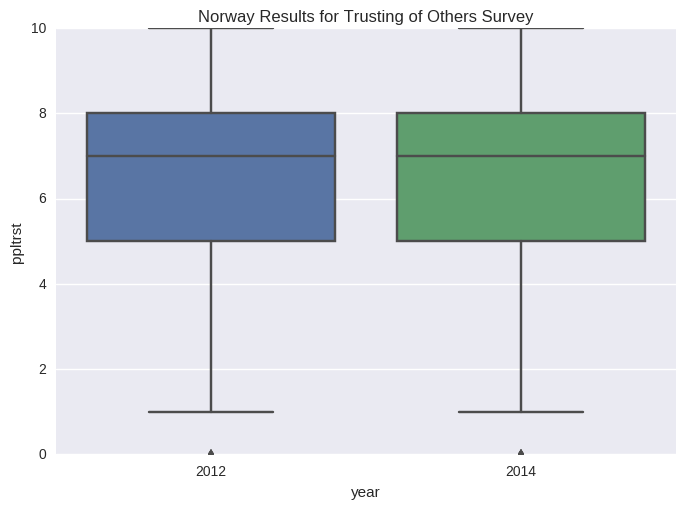

In [57]:
grpby = Norway_Data.groupby(['year'], as_index=False)
print(grpby.count())
sb.boxplot(y="ppltrst", x="year", data=Norway_Data)
sb.plt.title('Norway Results for Trusting of Others Survey')
plt.show()

The distributions of the two years for Norway appear to be identical.

In [37]:
# Determining if there is a significant difference in how those surveyed from Norway
# trust others between 2012 and 2014
stats.kruskal(Norway_Data.query('year == 2012').ppltrst,
              Norway_Data.query('year == 2014').ppltrst, nan_policy='omit')

KruskalResult(statistic=0.24473874253133701, pvalue=0.62080430049698654)

### Sweden

   year  cntry  idno  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0  2012    908   908    908      906      905     907    907      907     902   
1  2014    908   908    907      908      905     906    905      908     904   

   gndr  agea  partner  
0   908   870      908  
1   908   878      908  


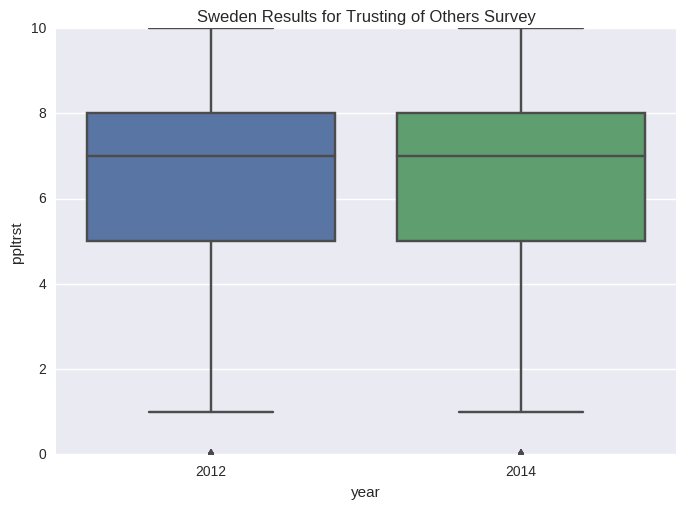

In [41]:
grpby = Sweden_Data.groupby(['year'], as_index=False)
print(grpby.count())
sb.boxplot(y="ppltrst", x="year", data=Sweden_Data)
sb.plt.title('Sweden Results for Trusting of Others Survey')
plt.show()

Like Norway, there is no change in the distribution for the results of the Trustworthiness of others survey between the two years. 

In [39]:
# Determining if there is a significant difference in those surveyed from Sweden
# trust others between 2012 and 2014
stats.kruskal(Sweden_Data.query('year == 2012').ppltrst,
              Sweden_Data.query('year == 2014').ppltrst, nan_policy='omit')

KruskalResult(statistic=4.2412547110440508, pvalue=0.03945299959307013)

In [40]:
print(Sweden_Data.query('year == 2012').ppltrst.isnull().sum())
print(Sweden_Data.query('year == 2014').ppltrst.isnull().sum())

2
0


### Germany

   year  cntry  idno  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0  2012     14    14     14       14       13      13     14       14      14   
1  2014     14    14     14       14       14      14     14       14      14   

   gndr  agea  partner  
0    14    14       14  
1    14    14       14  


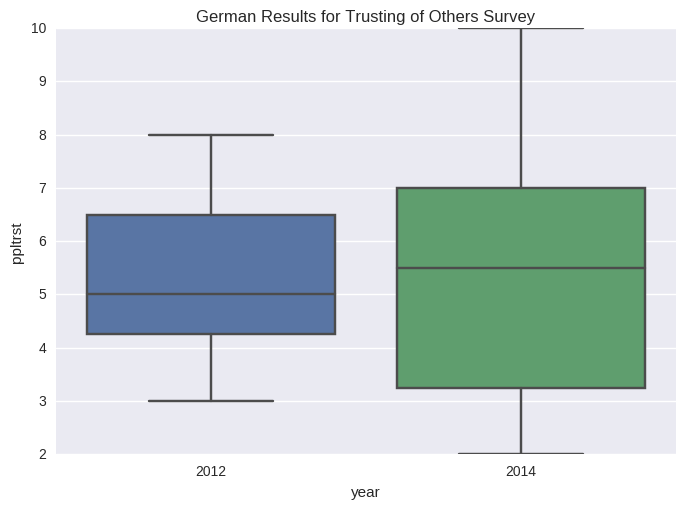

In [42]:
grpby = Germany_Data.groupby(['year'], as_index=False)
print(grpby.count())
sb.boxplot(y="ppltrst", x="year", data=Germany_Data)
sb.plt.title('German Results for Trusting of Others Survey')
plt.show()

The range of responses is greater in 2014.  Not much can be said about the population as a whole with only 14 individuals surveyed in each of the two years. 

In [43]:
# Determining if there is a significant difference in those surveyed from Germany
# trust others between 2012 and 2014
stats.kruskal(Germany_Data.query('year == 2012').ppltrst,
              Germany_Data.query('year == 2014').ppltrst, nan_policy='omit')

KruskalResult(statistic=0.03493591039585809, pvalue=0.85173001912501989)

## Result

Only one of the six countries showed any difference in the trustworthiness of others from the year 2012 to the year 2014; Spain. The rest of the countries showed no difference between the two years. 

## 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [51]:
grpby = survey_data.groupby(['cntry','year'])
grpby.median()

idno  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  \
cntry year                                                                
CH    6         1432.0    3.0      6.0      7.0     6.0    8.0      5.0   
      7         1432.0    3.0      6.0      7.0     6.0    8.0      6.0   
CZ    6         1333.5    6.0      4.0      5.0     4.0    7.0      5.0   
      7         1333.5    5.0      5.0      5.0     5.0    7.0      4.0   
DE    6     11000271.0    5.5      5.0      6.0     5.0    8.0      5.0   
      7     11000271.0    3.0      5.5      7.0     5.5    8.0      4.0   
ES    6         1456.0    4.0      5.0      5.0     5.0    8.0      6.0   
      7         1456.0    4.0      5.0      5.0     5.0    8.0      6.0   
NO    6        14346.0    4.0      7.0      7.0     6.0    8.0      6.0   
      7        14346.0    4.0      7.0      7.0     6.0    8.0      6.0   
SE    6         1585.0    4.0      7.0      7.0     6.0    8.0      6.0   
      7         1585.0    4.0      7.0      7.0     6.0    8.0      6.0   

            sclact  gndr  agea  partner  
cntry year                               
CH    6        3.0   2.0  47.0      1.0  
      7        3.0   2.0  45.0      1.0  
CZ    6        3.0   2.0  47.0      1.0  
      7        3.0   2.0  45.0      1.0  
DE    6        3.0   2.0  54.0      1.0  
      7        3.0   2.0  56.5      1.0  
ES    6        3.0   2.0  46.0      1.0  
      7        3.0   1.0  47.0      1.0  
NO    6        3.0   1.0  46.0      1.0  
      7        3.0   1.0  47.0      1.0  
SE    6        3.0   1.0  50.0      1.0  
      7        3.0   1.0  51.0      1.0

### Switzerland

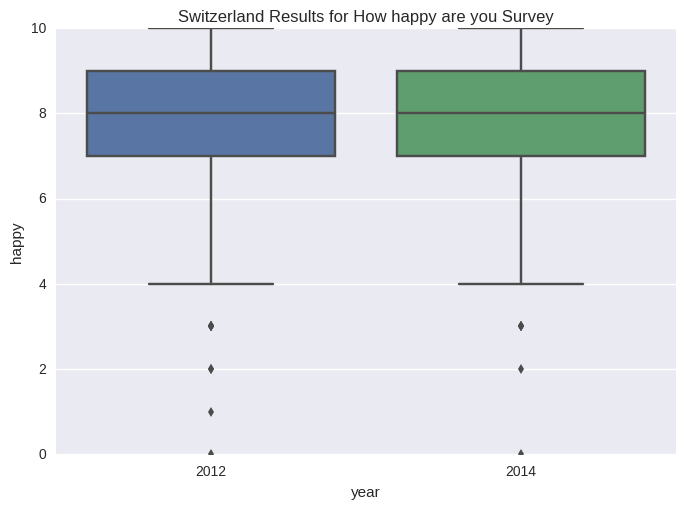

In [45]:
sb.boxplot(y="happy", x="year", data=Switzerland_Data)
sb.plt.title('Switzerland Results for How happy are you Survey')
plt.show()

The two box plots show almost no difference between the two years except for the number of low outliers. Suspect that the difference between the two data sets will not be significant. 

In [47]:
# Determining if there is a significant difference in how happy those surveyed from Switzerland
# are from 2012 to 2014
stats.kruskal(Switzerland_Data.query('year == 2012').happy,
              Switzerland_Data.query('year == 2014').happy, nan_policy='omit')

KruskalResult(statistic=0.22331955287588717, pvalue=0.63652214320425471)

### Czech Republic

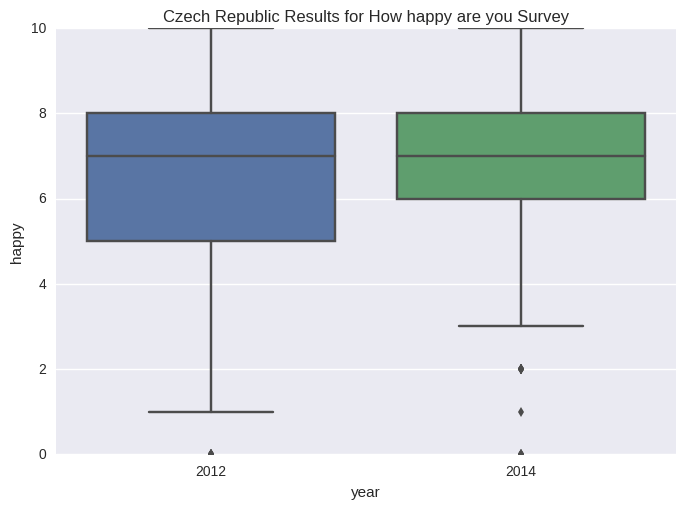

In [53]:
sb.boxplot(y="happy", x="year", data=CzechRepublic_Data)
sb.plt.title('Czech Republic Results for How happy are you Survey')
plt.show()

The results are similar top that of Switzerland except that the median is higher at 8.
The two box plots show almost no difference between the two years except for the number of low outliers and the minimum scores.  Suspect that the difference between the two data sets will not be significant. 

In [54]:
# Determining if there is a significant difference in how happy those surveyed from the Czech Republic
# are from 2012 to 2014
stats.kruskal(CzechRepublic_Data.query('year == 2012').happy,
              CzechRepublic_Data.query('year == 2014').happy, nan_policy='omit')

KruskalResult(statistic=1.4258218687180508, pvalue=0.23244752383800671)

### Spain 

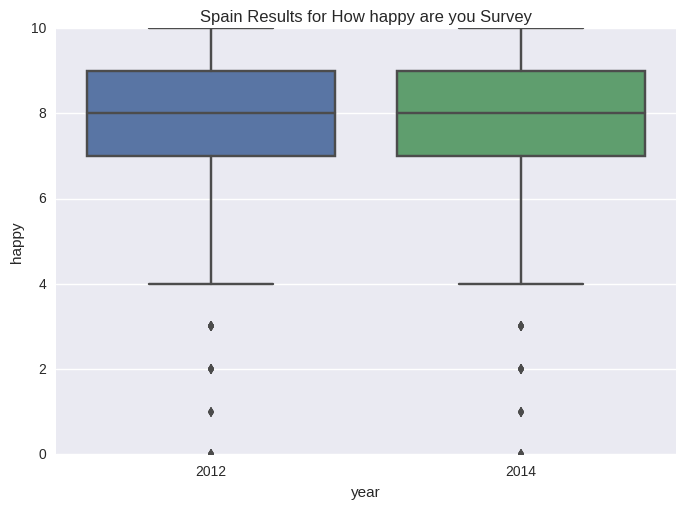

In [55]:
sb.boxplot(y="happy", x="year", data=Spain_Data)
sb.plt.title('Spain Results for How happy are you Survey')
plt.show()

The two distribution of the ordinal data are the same for the two years. Europeans are so happy.

In [56]:
# Determining if there is a significant difference in how happy those surveyed from Spain
# are from 2012 to 2014
stats.kruskal(Spain_Data.query('year == 2012').happy,
              Spain_Data.query('year == 2014').happy, nan_policy='omit')

KruskalResult(statistic=4.0892036411772681, pvalue=0.043157971896250848)

### Norway

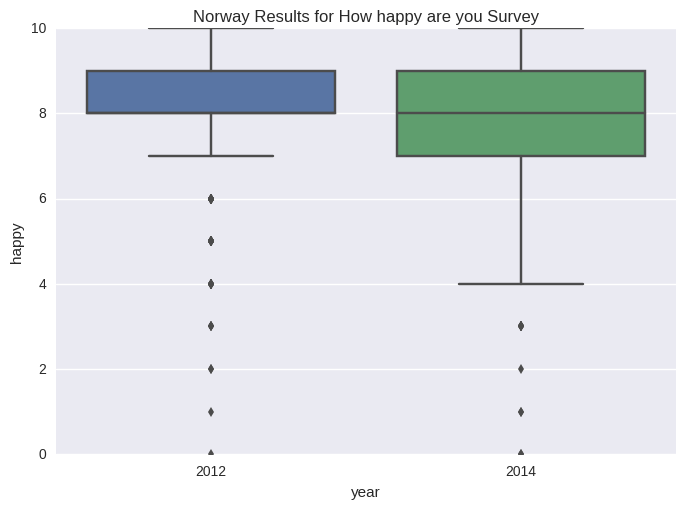

In [58]:
sb.boxplot(y="happy", x="year", data=Norway_Data)
sb.plt.title('Norway Results for How happy are you Survey')
plt.show()

Interestingly , there is wider spread of responses for those from Norway in 2014 than 2012. Perhaps indicating that more individuals were less happy in 2014 than 2012.  There were 727 responses in 2012  and 731 responses in 2014.

In [59]:
# Determining if there is a significant difference in how happy those surveyed from Norway
# are from 2012 to 2014
stats.kruskal(Norway_Data.query('year == 2012').happy,
              Norway_Data.query('year == 2014').happy, nan_policy='omit')

KruskalResult(statistic=19.139561932891844, pvalue=1.215001301639077e-05)

A very significant result for the data set, those surveyed where not has happy  in 2014 than 2012.

### Sweden

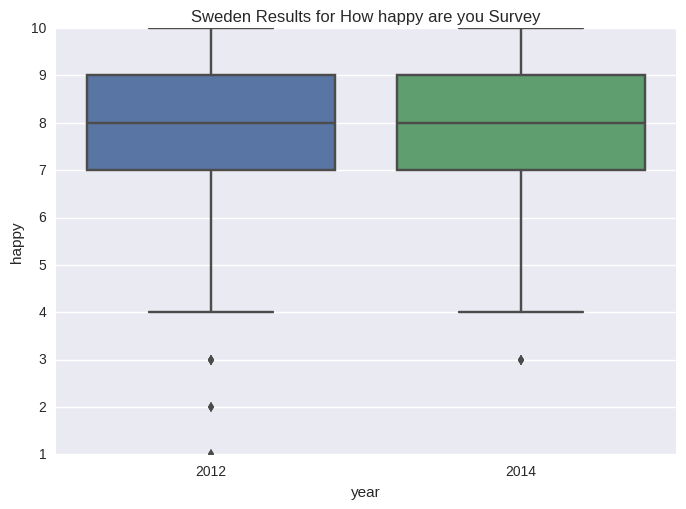

In [60]:
sb.boxplot(y="happy", x="year", data=Sweden_Data)
sb.plt.title('Sweden Results for How happy are you Survey')
plt.show()

In [61]:
# Determining if there is a significant difference in how happy those surveyed from Norway
# are from 2012 to 2014
stats.kruskal(Sweden_Data.query('year == 2012').happy,
              Sweden_Data.query('year == 2014').happy, nan_policy='omit')

KruskalResult(statistic=0.050457345200528352, pvalue=0.82226936153714048)

### Germany

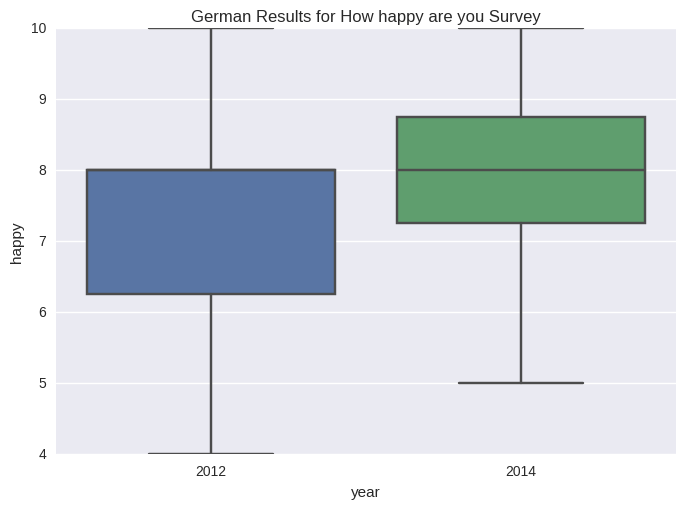

In [63]:
sb.boxplot(y="happy", x="year", data=Germany_Data)
sb.plt.title('German Results for How happy are you Survey')
plt.show()

Of the 14 individuals that completed the survey of each year the dispersion of scores is tighter for 2015 than 2012.
The median values were the same for both years. Compared to other countries the minimum scores are higher at 4 than zero for most. 

In [64]:
# Determining if there is a significant difference in how happy those surveyed from Germany
# are from 2012 to 2014
stats.kruskal(Germany_Data.query('year == 2012').happy,
              Germany_Data.query('year == 2014').happy, nan_policy='omit')

KruskalResult(statistic=0.39056749122656015, pvalue=0.53200125505866203)

## Result

The only difference seen in the six different countries for Happiness was Norway where people became less happy.  There was a decline from 2012 when compared to the results from 2014. 

## 3. Who reported watching more TV in 2012, men or women?